In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator, VectorialPolarPropagator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
n_pix_pupil = 1024
n_pix_psf = 201
NA = 1.4
wavelength = 632
fov = 1500
defocus = 0
n_defocus = 1

# pupil1 = ScalarCartesianPupil(n_pix_pupil)
# pupil2 = ScalarPolarPupil(n_pix_pupil)
# pupil3 = VectorialCartesianPupil(n_pix_pupil)
pupil4 = VectorialPolarPupil(e0x=1, e0y=0, n_pix_pupil=n_pix_pupil)
print(pupil4.field.shape)


torch.Size([1, 2, 1024])


tensor(1.0466)
torch.Size([1, 3, 201, 201])


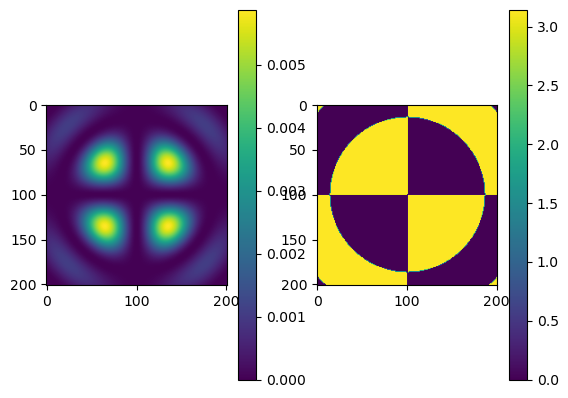

In [20]:
propagator4 = VectorialPolarPropagator(pupil4, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov,
                                    defocus_min=0, defocus_max=defocus, n_defocus=n_defocus)
field4 = propagator4.compute_focus_field()
print(torch.max(torch.abs(field4)))

idx = 0
ax_idx = 1
print(field4.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field4[idx,ax_idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field4[idx,ax_idx,...].squeeze()))
plt.colorbar()
plt.show()